In [2]:
import os
from PIL import Image
import shutil
import random
import matplotlib.pyplot as plt

def data_check(dir):
    # Walk through the data directory
    for dirpath, _, filenames in os.walk(dir):
        print(f"\nChecking {dirpath}:")
        for filename in filenames:
            # Check image files 
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                path = os.path.join(dirpath, filename)
                try:
                    img = Image.open(path)
                    img.resize((256, 256), Image.BICUBIC)
                except:
                    print(f"Cannot open {filename}")
    print("Done!")



def replace_data(corrupted_filenames, directory):
    classes = []
    class_files = {}

    # Get the classes that have corrupted files
    for corrupted in corrupted_filenames:
        class_id = corrupted.split('_')[0]
        if class_id not in classes:
            classes.append(class_id)

    # Populate the dictionary with lists of files for each class
    for filename in os.listdir(directory):
        class_id = filename.split('_')[0]
        if class_id in classes:
            if class_id not in class_files:
                class_files[class_id] = []
            class_files[class_id].append(filename)

    # Process each corrupted file
    for corrupted in corrupted_filenames:
        class_id = corrupted.split('_')[0]
        # Try to find a replacement image
        available_files = [f for f in class_files[class_id] if f != corrupted]
        if available_files:
            # Choose the first available file as a replacement
            replacement_file = available_files[0]
            
            # Path for corrupted and replacement files
            corrupted_path = os.path.join(directory, corrupted)
            replacement_path = os.path.join(directory, replacement_file)

            # Delete the corrupted file
            os.remove(corrupted_path)
            print(f"Deleted corrupted file: {corrupted_path}")

            # Copy the replacement file to a new file with the corrupted file's name
            new_copy_path = os.path.join(directory, corrupted)
            shutil.copy(replacement_path, new_copy_path)
            print(f"Replaced {corrupted} with a copy of {replacement_file}")
        else:
            print(f"No available files to replace {corrupted} in class {class_id}")
    print("Done!")



def visualise_samples(dir):
    filenames = []
    for _, _, fn in os.walk(dir):
        filenames += fn
    figure = plt.figure(figsize=(11, 11))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        x = random.randint(0, len(filenames)-1)
        figure.add_subplot(rows, cols, i)
        plt.title(f"{filenames[x].split('_')[0]}")
        plt.axis("off")
        file_path = os.path.join(dir, filenames[x])
        img = Image.open(file_path)
        plt.imshow(img)
    plt.show()

In [1]:
dir = './dataset/stable_diffusion_1_4'
data_check(dir)


Checking ./dataset/stable_diffusion_1_4:

Checking ./dataset/stable_diffusion_1_4/val:

Checking ./dataset/stable_diffusion_1_4/val/nature:

Checking ./dataset/stable_diffusion_1_4/val/ai:

Checking ./dataset/stable_diffusion_1_4/train:

Checking ./dataset/stable_diffusion_1_4/train/nature:

Checking ./dataset/stable_diffusion_1_4/train/ai:
Cannot open 033_sdv4_00137.png
Cannot open 033_sdv4_00152.png
Cannot open 033_sdv4_00134.png


In [2]:
directory = './dataset/stable_diffusion_1_4/train/ai'
corrupted_filenames = ['033_sdv4_00137.png', '033_sdv4_00152.png', '033_sdv4_00134.png']
replace_data(corrupted_filenames, directory)

Deleted corrupted file: ./dataset/stable_diffusion_1_4/train/ai/033_sdv4_00137.png
Replaced 033_sdv4_00137.png with a copy of 033_sdv4_00085.png
Deleted corrupted file: ./dataset/stable_diffusion_1_4/train/ai/033_sdv4_00152.png
Replaced 033_sdv4_00152.png with a copy of 033_sdv4_00085.png
Deleted corrupted file: ./dataset/stable_diffusion_1_4/train/ai/033_sdv4_00134.png
Replaced 033_sdv4_00134.png with a copy of 033_sdv4_00085.png


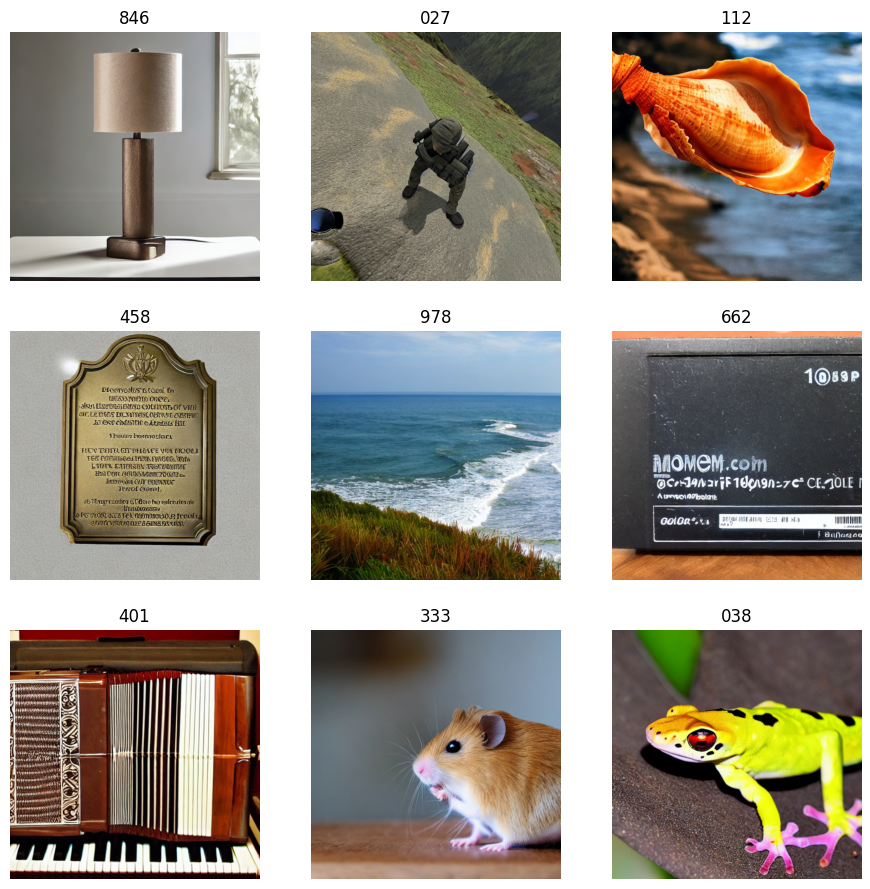

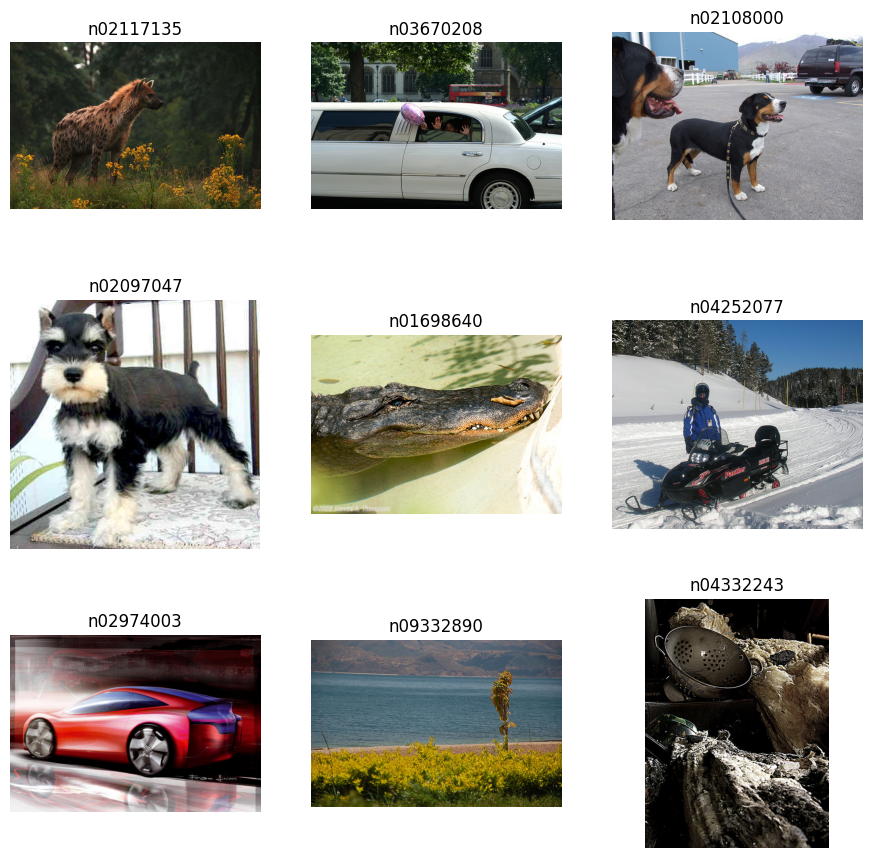

In [31]:
dir = './dataset/stable_diffusion_1_4/train/ai'
visualise_samples(dir)
dir = './dataset/stable_diffusion_1_4/train/nature'
visualise_samples(dir)

In [3]:
dir = './dataset/adm'
data_check(dir)


Checking ./dataset/adm:

Checking ./dataset/adm/val:

Checking ./dataset/adm/val/nature:



Checking ./dataset/adm/val/ai:

Checking ./dataset/adm/train:

Checking ./dataset/adm/train/nature:

Checking ./dataset/adm/train/ai:
Cannot open 115_adm_154.PNG
Cannot open 115_adm_142.PNG
Cannot open 115_adm_135.PNG
Cannot open 115_adm_141.PNG
Cannot open 115_adm_164.PNG
Cannot open 115_adm_156.PNG


In [5]:
directory = './dataset/adm/train/ai'
corrupted_filenames = ['115_adm_142.PNG', '115_adm_135.PNG', '115_adm_141.PNG', '115_adm_164.PNG', '115_adm_156.PNG']
replace_data(corrupted_filenames, directory)



Deleted corrupted file: ./dataset/adm/train/ai/115_adm_142.PNG
Replaced 115_adm_142.PNG with a copy of 115_adm_71.PNG
Deleted corrupted file: ./dataset/adm/train/ai/115_adm_135.PNG
Replaced 115_adm_135.PNG with a copy of 115_adm_71.PNG
Deleted corrupted file: ./dataset/adm/train/ai/115_adm_141.PNG
Replaced 115_adm_141.PNG with a copy of 115_adm_71.PNG
Deleted corrupted file: ./dataset/adm/train/ai/115_adm_164.PNG
Replaced 115_adm_164.PNG with a copy of 115_adm_71.PNG
Deleted corrupted file: ./dataset/adm/train/ai/115_adm_156.PNG
Replaced 115_adm_156.PNG with a copy of 115_adm_71.PNG
Done!


In [2]:
dir = './dataset/wukong'
data_check(dir)


Checking ./dataset/wukong:

Checking ./dataset/wukong/val:

Checking ./dataset/wukong/val/nature:

Checking ./dataset/wukong/val/ai:

Checking ./dataset/wukong/train:

Checking ./dataset/wukong/train/nature:

Checking ./dataset/wukong/train/ai:
Done!


In [4]:
dir = './dataset/vqdm'
data_check(dir)


Checking ./dataset/vqdm:

Checking ./dataset/vqdm/val:

Checking ./dataset/vqdm/val/nature:

Checking ./dataset/vqdm/val/ai:

Checking ./dataset/vqdm/train:

Checking ./dataset/vqdm/train/nature:

Checking ./dataset/vqdm/train/ai:
Done!


In [3]:
dir = './dataset/big_gan'
data_check(dir)


Checking ./dataset/big_gan:

Checking ./dataset/big_gan/val:

Checking ./dataset/big_gan/val/nature:

Checking ./dataset/big_gan/val/ai:

Checking ./dataset/big_gan/train:

Checking ./dataset/big_gan/train/nature:

Checking ./dataset/big_gan/train/ai:
Cannot open 116_biggan_00098.png
Cannot open 116_biggan_00094.png
Cannot open 116_biggan_00107.png
Cannot open 116_biggan_00081.png
Done!


In [5]:
directory = './dataset/big_gan/train/ai'
corrupted_filenames = ['116_biggan_00098.png', '116_biggan_00094.png', '116_biggan_00107.png', '116_biggan_00081.png']
replace_data(corrupted_filenames, directory)

Deleted corrupted file: ./dataset/big_gan/train/ai/116_biggan_00098.png
Replaced 116_biggan_00098.png with a copy of 116_biggan_00045.png
Deleted corrupted file: ./dataset/big_gan/train/ai/116_biggan_00094.png
Replaced 116_biggan_00094.png with a copy of 116_biggan_00045.png
Deleted corrupted file: ./dataset/big_gan/train/ai/116_biggan_00107.png
Replaced 116_biggan_00107.png with a copy of 116_biggan_00045.png
Deleted corrupted file: ./dataset/big_gan/train/ai/116_biggan_00081.png
Replaced 116_biggan_00081.png with a copy of 116_biggan_00045.png
Done!


In [3]:
dir = './dataset/stable_diffusion_1_5'
data_check(dir)


Checking ./dataset/stable_diffusion_1_5:

Checking ./dataset/stable_diffusion_1_5/val:

Checking ./dataset/stable_diffusion_1_5/val/nature:

Checking ./dataset/stable_diffusion_1_5/val/ai:

Checking ./dataset/stable_diffusion_1_5/train:

Checking ./dataset/stable_diffusion_1_5/train/ai:
Cannot open 763_sdv5_00052.png
Done!


In [5]:
directory = './dataset/stable_diffusion_1_5/train/ai'
corrupted_filenames = ['763_sdv5_00052.png']
replace_data(corrupted_filenames, directory)

Deleted corrupted file: ./dataset/stable_diffusion_1_5/train/ai/763_sdv5_00052.png
Replaced 763_sdv5_00052.png with a copy of 763_sdv5_00033.png
Done!


In [4]:
dir = './dataset/glide'
data_check(dir)


Checking ./dataset/glide:

Checking ./dataset/glide/val:

Checking ./dataset/glide/val/nature:

Checking ./dataset/glide/val/ai:

Checking ./dataset/glide/train:

Checking ./dataset/glide/train/nature:

Checking ./dataset/glide/train/ai:
Cannot open 808_glide_00033.png
Done!


In [3]:
directory = './dataset/glide/train/ai'
corrupted_filenames = ['808_glide_00033.png']
replace_data(corrupted_filenames, directory)

Deleted corrupted file: ./dataset/glide/train/ai/808_glide_00033.png
Replaced 808_glide_00033.png with a copy of 808_glide_00096.png
Done!


In [3]:
dir = './dataset/midjourney'
data_check(dir)


Checking ./dataset/midjourney:

Checking ./dataset/midjourney/val:

Checking ./dataset/midjourney/val/nature:

Checking ./dataset/midjourney/val/ai:

Checking ./dataset/midjourney/train:

Checking ./dataset/midjourney/train/nature:

Checking ./dataset/midjourney/train/ai:
Cannot open 208_midjourney_92.png
Cannot open 208_midjourney_91.png
Cannot open 208_midjourney_76.png
Done!


In [4]:
directory = './dataset/midjourney/train/ai'
corrupted_filenames = ['208_midjourney_91.png', '208_midjourney_76.png', '208_midjourney_92.png']
replace_data(corrupted_filenames, directory)

Deleted corrupted file: ./dataset/midjourney/train/ai/208_midjourney_91.png
Replaced 208_midjourney_91.png with a copy of 208_midjourney_193.png
Deleted corrupted file: ./dataset/midjourney/train/ai/208_midjourney_76.png
Replaced 208_midjourney_76.png with a copy of 208_midjourney_193.png
Deleted corrupted file: ./dataset/midjourney/train/ai/208_midjourney_92.png
Replaced 208_midjourney_92.png with a copy of 208_midjourney_193.png
Done!


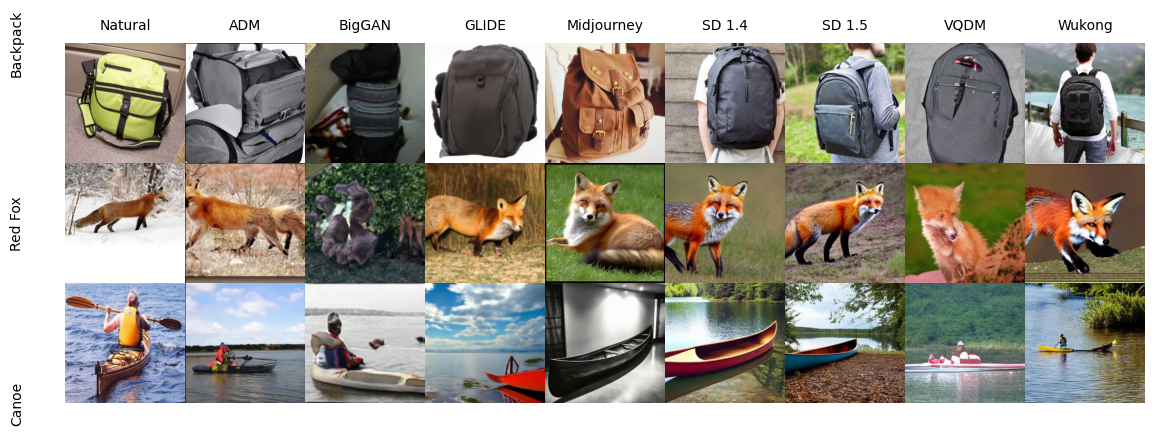

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Array of image paths
base_path = '/home/scardovi/genimage256/'
image_paths = [
    'stable_diffusion_1_4/train/nature/n02769748_39190.JPEG', 'adm/train/ai/414_adm_101.JPEG', 'big_gan/train/ai/414_biggan_00124.JPEG', 'glide/train/ai/414_glide_00105.JPEG', 'midjourney/train/ai/414_midjourney_190.JPEG',
    'stable_diffusion_1_4/train/ai/414_sdv4_00070.JPEG', 'stable_diffusion_1_5/train/ai/414_sdv5_00193.JPEG', 'vqdm/train/ai/414_vqdm_00120.JPEG', 'wukong/train/ai/414_wukong_image62.JPEG',
    'stable_diffusion_1_4/train/nature/n02119022_7713.JPEG', 'adm/train/ai/277_adm_177.JPEG', 'big_gan/train/ai/277_biggan_00004.JPEG', 'glide/train/ai/277_glide_00030.JPEG', 'midjourney/train/ai/277_midjourney_118.JPEG',
    'stable_diffusion_1_4/train/ai/277_sdv4_00167.JPEG', 'stable_diffusion_1_5/train/ai/277_sdv5_00018.JPEG', 'vqdm/train/ai/277_vqdm_00171.JPEG', 'wukong/train/ai/277_wukong_image0.JPEG',
    'glide/train/nature/n02951358_20116.JPEG', 'adm/train/ai/472_adm_176.JPEG', 'big_gan/train/ai/472_biggan_00171.JPEG', 'glide/train/ai/472_glide_00086.JPEG', 'midjourney/train/ai/472_midjourney_3.JPEG',
    'stable_diffusion_1_4/train/ai/472_sdv4_00008.JPEG', 'stable_diffusion_1_5/train/ai/472_sdv5_00148.JPEG', 'vqdm/train/ai/472_vqdm_00094.JPEG', 'wukong/train/ai/472_wukong_image75.JPEG'
]

# Column and row labels
column_labels = ['Natural', 'ADM', 'BigGAN', 'GLIDE', 'Midjourney', 
                 'SD 1.4', 'SD 1.5', 'VQDM', 'Wukong']
row_labels = ['Backpack', 'Red Fox', 'Canoe']

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(12, 6))

# Remove spacing between subplots
plt.subplots_adjust(left=0.05, right=0.95, top=0.70, bottom=0.1, wspace=0, hspace=0)

# Loop through the axes and plot images
for i, ax in enumerate(axes.flat):
    # Load and display the image
    img = mpimg.imread(base_path+image_paths[i])
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Add column labels
for ax, col in zip(axes[0], column_labels):
    ax.set_title(col, fontsize=10, pad=10)

# Add row labels by using fig.text to position them
for i, row in enumerate(row_labels):
    fig.text(0.01, 0.7 - i * 0.3, row, va='center', ha='center', fontsize=10, rotation=90)

# Display the plot
plt.show()
